#  Drilling ROP Prediction

ROP (Rate of Penetration) is a very important parameter in the drilling process, as it directly impacts the efficiency, cost, and safety of drilling operations. In this project, a regression-based machine learning approach is used to create a predictive model that takes input features related to drilling parameters, geological characteristics, and other relevant factors, and then generates a prediction of the output ROP.  Through this project, we can analyze the factors that affect ROP and also predict ROP.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

# Import Dataset

In [7]:
#importing dataset
data = pd.read_csv('https://raw.githubusercontent.com/hisyamilys/ROP-Prediction/main/UP-5.csv')
data.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


About the features of dataset
* FORMATION, is the name of the rock formation penetrated at a certain depth.
* TMD, is the true measured depth (meters)
* TVD, is the true vertical depth (meters)
* ROP, is the rate of penetration (meters/hour)
* WOB, is the weight on bit (tons)
* FR, is the mud flow rate (gallons/minute)
* SPP, is the stand-pipe pressure (psi)
* RPM, is the angular speed of rotation of the drill string (rpm)
* TQ, is the torque reading (pound-foot)
* MW IN, is the density of mud pumped through the drill string (pounds/gallon)
* MW OUT, is the density of mud returning to the surface (pounds/gallon)
* RETURN, is the percentage of mud volume that returns to the surface (%)
* BIT TIME, is the duration for which the same bit was used (hours)
* DATE TIME, is the date and time to penetrate a certain depth.

# Exploratory Data Analysis

## Data Preprocessing

* In the beginning stages of data preprocessing, we looked at the dataset shape to understand how many dimensions it has.
* After that, we looked for any missing values in the dataset and got rid of them if we found any.
* We also made sure there were no duplicated values in the dataset, and if we found any, we fixed them to make sure the dataset is accurate and reliable.
* We looked at a heatmap that showed how different things are connected. This picture helped us see the patterns and how stuff in the data are related to each other. It made it easier to understand how different characteristics work together.

In [ ]:
#checking feature name of dataset
data.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [ ]:
#checking shape of dataset
data.shape

(2058, 14)

In [ ]:
#detailing info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Formation      2058 non-null   object 
 1   TMD (m)        2058 non-null   int64  
 2   TVD (m)        2058 non-null   float64
 3   ROP (m/hr)     2058 non-null   float64
 4   WOB (ton)      2058 non-null   int64  
 5   FR (gpm)       2058 non-null   float64
 6   SPP (psi)      2058 non-null   int64  
 7   RPM (rpm)      2058 non-null   int64  
 8   TQ (lb.ft)     2058 non-null   int64  
 9   MW IN (ppg)    2058 non-null   float64
 10  MW OUT (ppg)   2058 non-null   float64
 11  RETURN (%)     2058 non-null   int64  
 12  BIT TIME (hr)  2058 non-null   float64
 13  DATE TIME      2058 non-null   object 
dtypes: float64(6), int64(6), object(2)
memory usage: 225.2+ KB


In [ ]:
#checking missing value in dataset
data.isnull().sum()

Formation        0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb.ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [ ]:
#checking duplicated value in dataset
data.duplicated().sum()

0

In [ ]:
#detailing statistics about dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TMD (m),2058.0,1456.500000,594.237747,428.000,942.2500,1456.500,1970.7500,2485.00
TVD (m),2058.0,1456.411924,594.199795,428.010,942.1775,1456.425,1970.6675,2484.79
ROP (m/hr),2058.0,72.522935,32.636414,3.100,49.7250,67.200,91.8750,203.20
WOB (ton),2058.0,8.744412,3.591133,0.000,7.0000,9.000,11.0000,22.00
FR (gpm),2058.0,824.538387,34.861439,428.800,815.2000,823.400,844.3000,1130.50
SPP (psi),2058.0,2959.543246,581.566385,547.000,2434.5000,2901.000,3443.5000,3966.00
RPM (rpm),2058.0,156.351312,23.840552,70.000,146.0000,158.000,167.0000,199.00
TQ (lb.ft),2058.0,9213.728377,3168.341569,784.000,6946.5000,9147.500,11404.5000,19822.00
MW IN (ppg),2058.0,10.852662,0.250399,10.400,10.5000,11.000,11.0000,11.00
MW OUT (ppg),2058.0,10.872496,0.262644,10.388,10.5560,10.900,11.0800,11.08


<ipython-input-106-7c30b5974140>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), fmt='.2g', annot=True)


<Axes: >

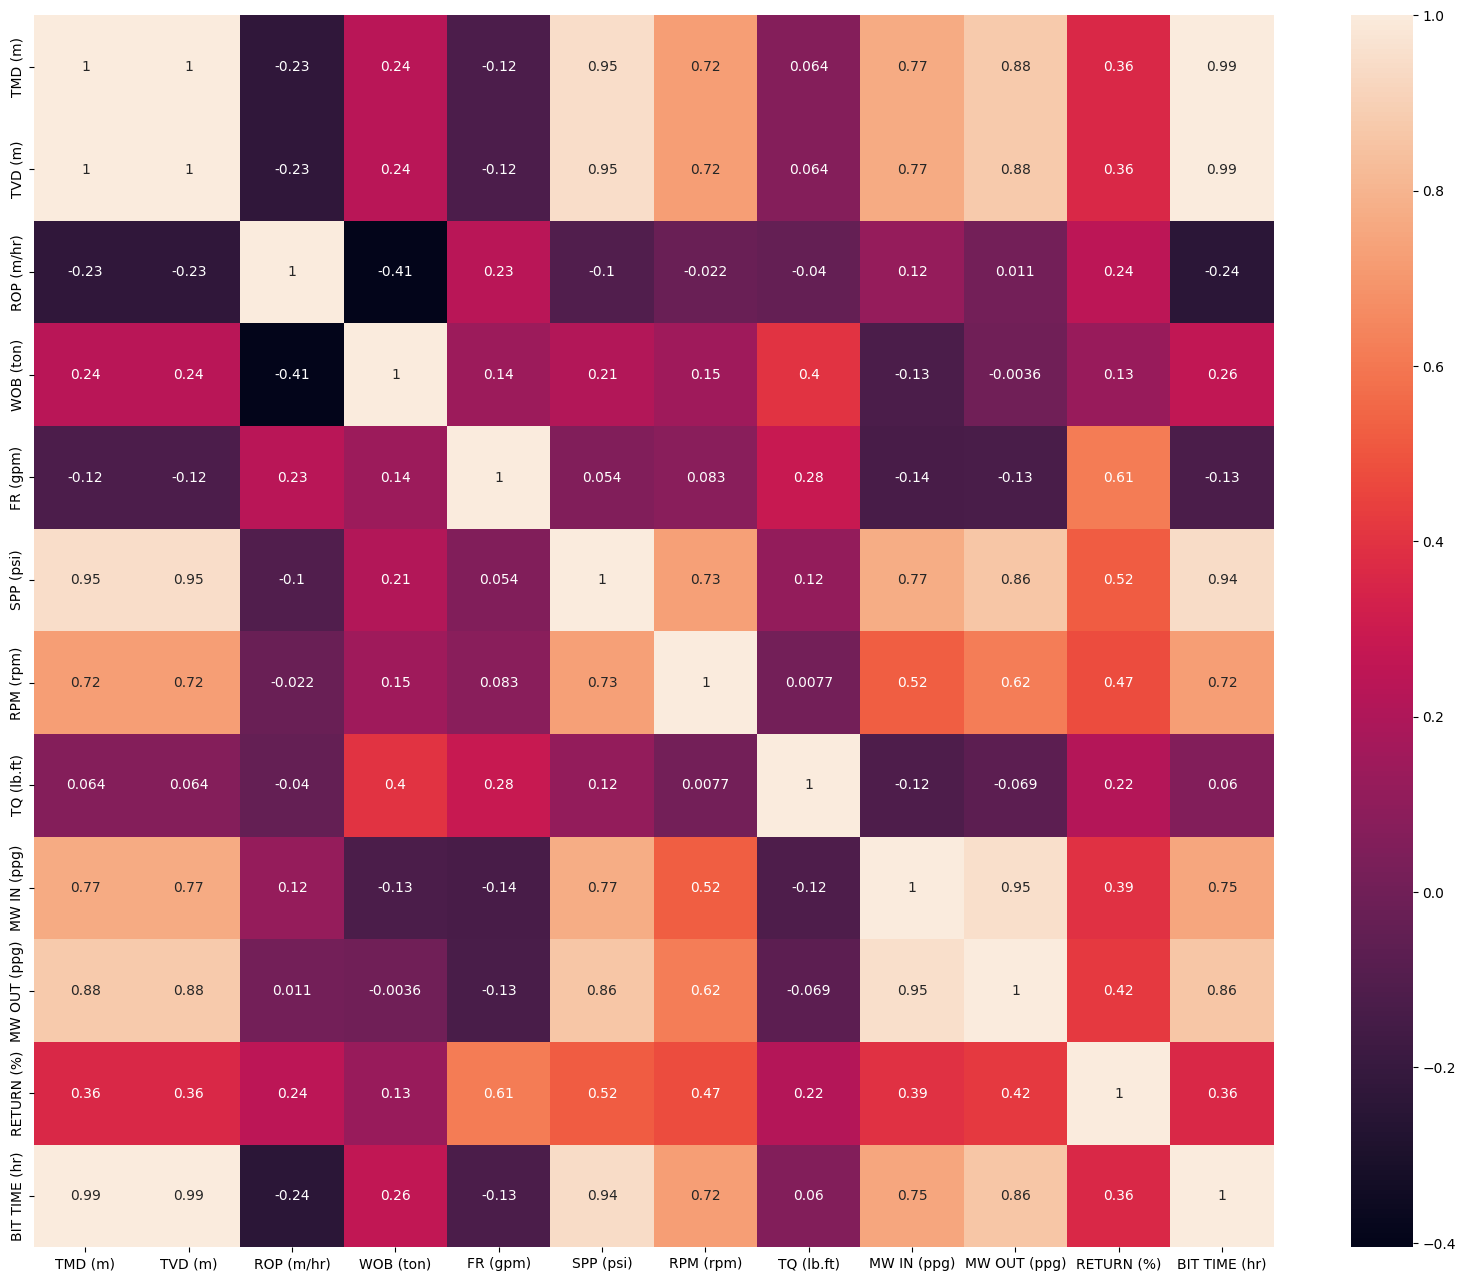

In [ ]:
#dispalying correlation heatmap
plt.figure(figsize=(20,16))
sb.heatmap(data.corr(), fmt='.2g', annot=True)

## Data Visualization

In the exploratory data analysis, we will be looking at the distribution of the data across the features. Through the visualization, we will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

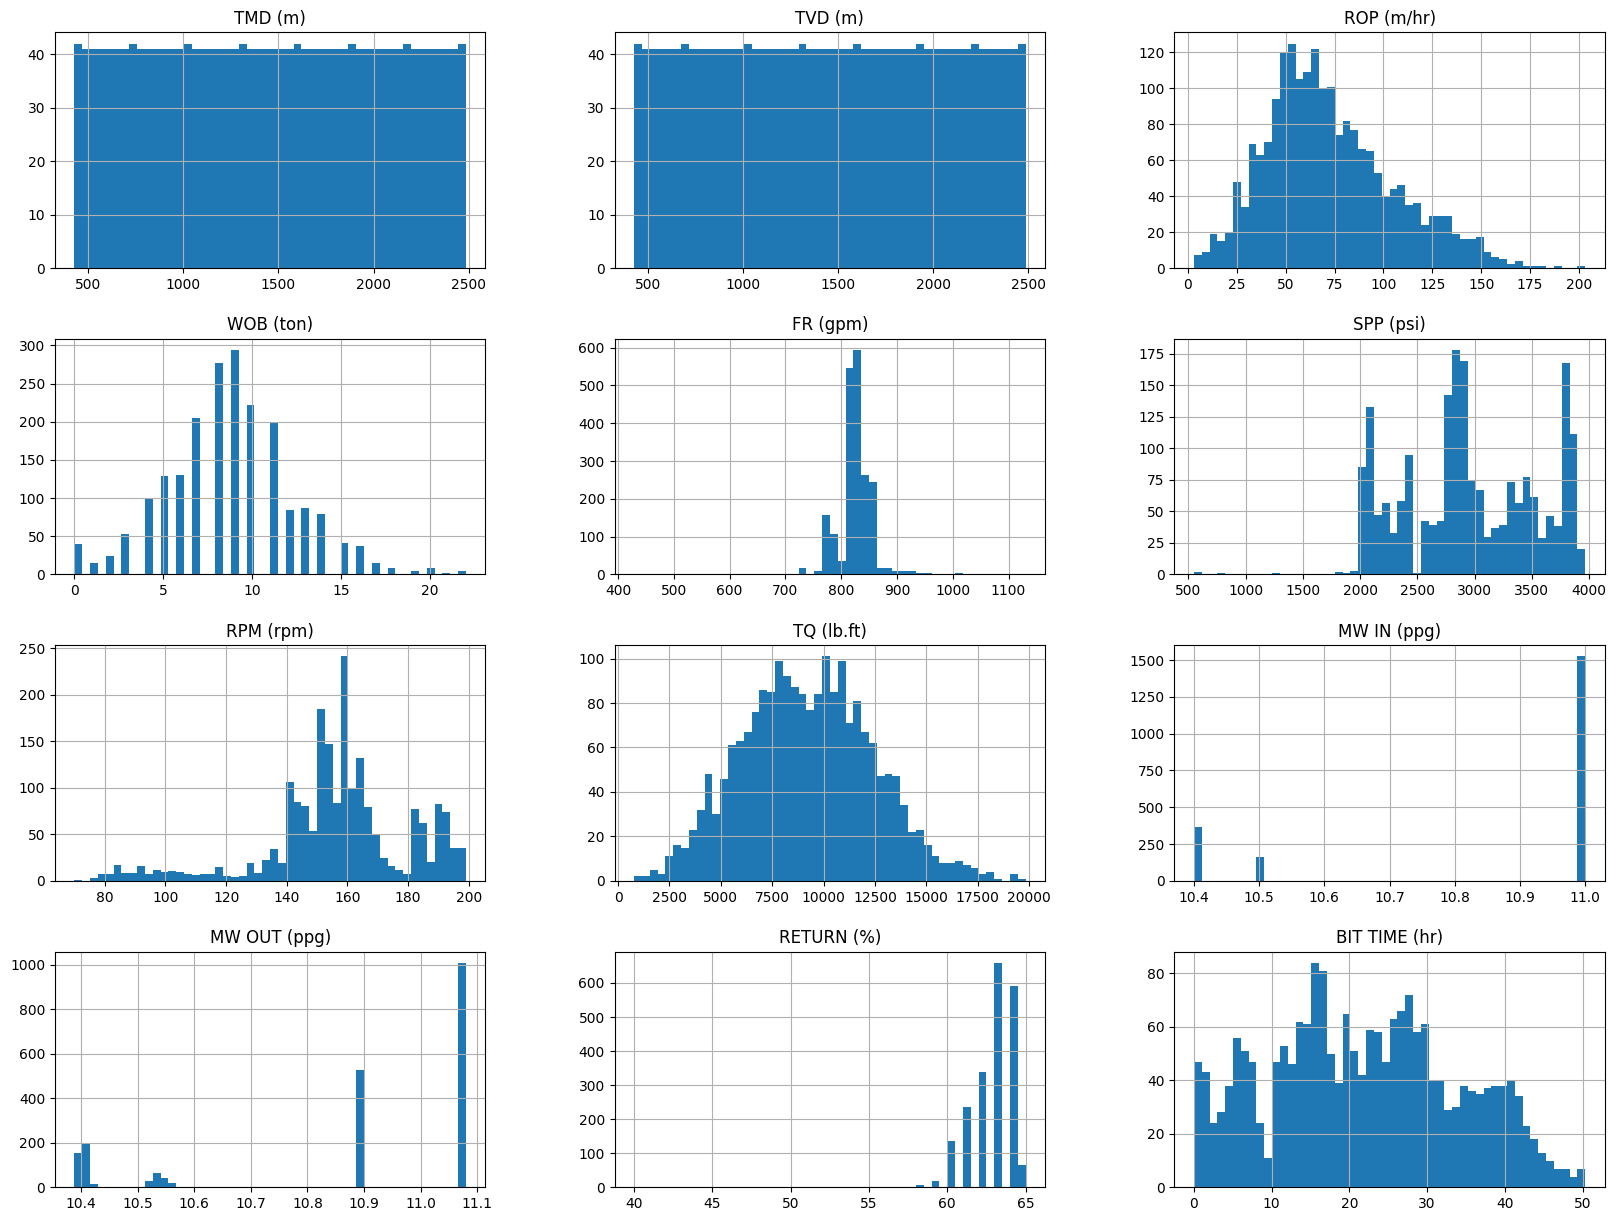

In [ ]:
#dispalying histogram (1)
data.hist(bins=50, figsize=(20,15))
plt.show()

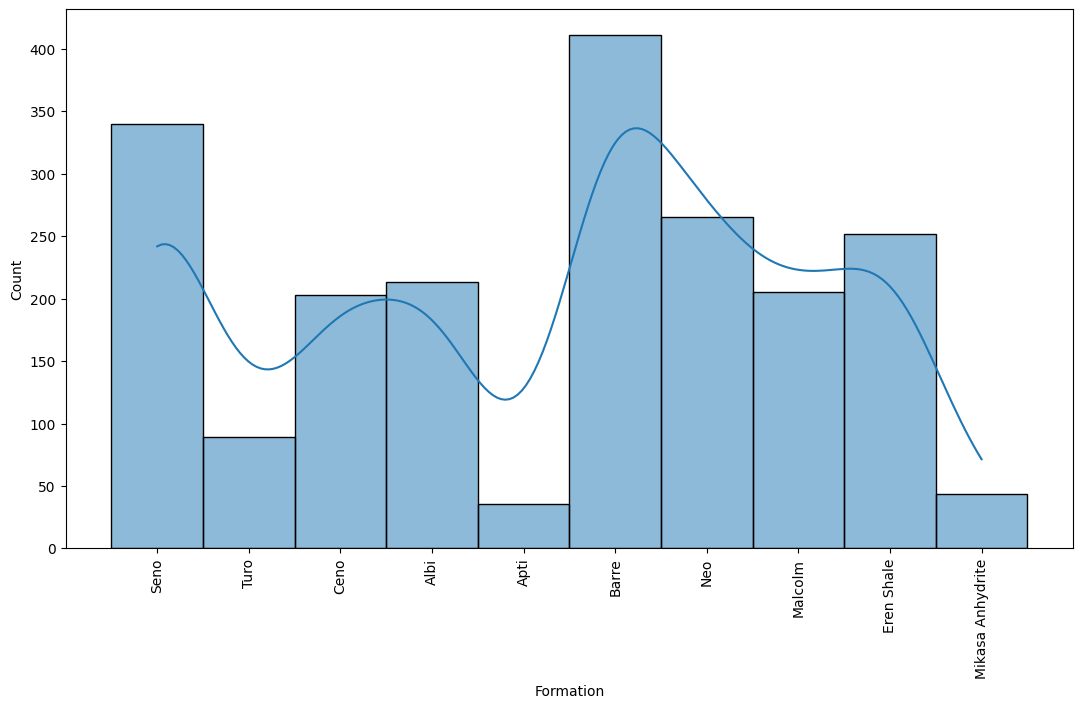

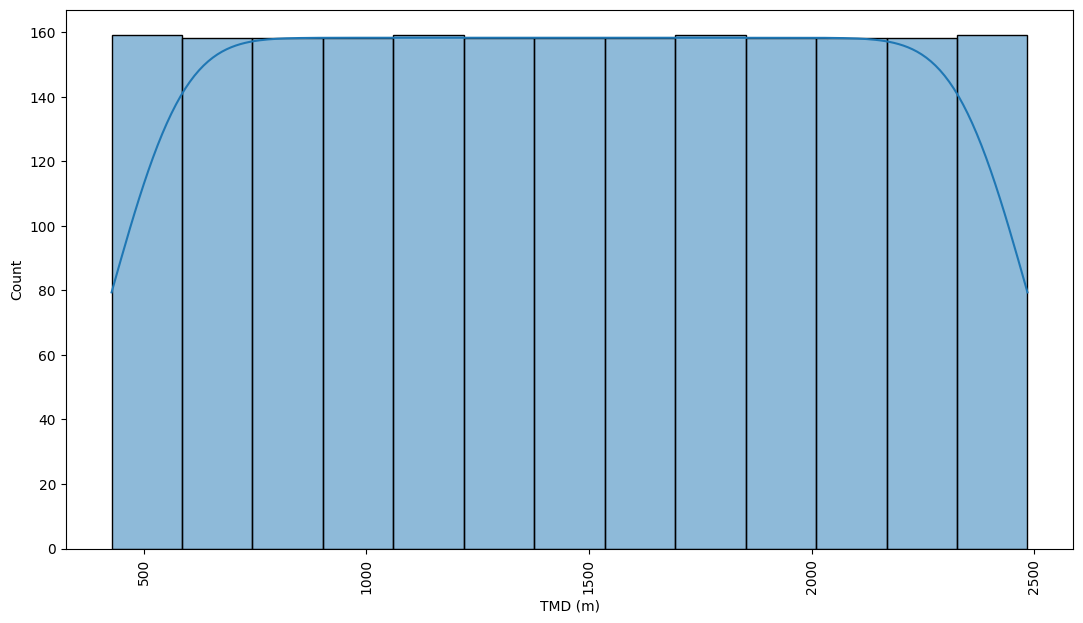

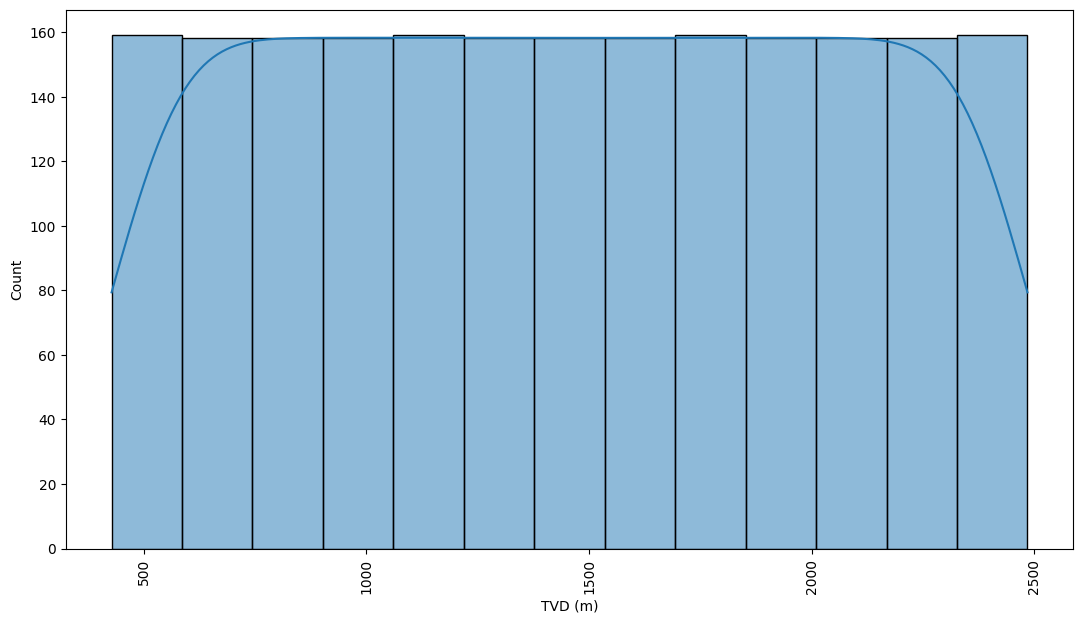

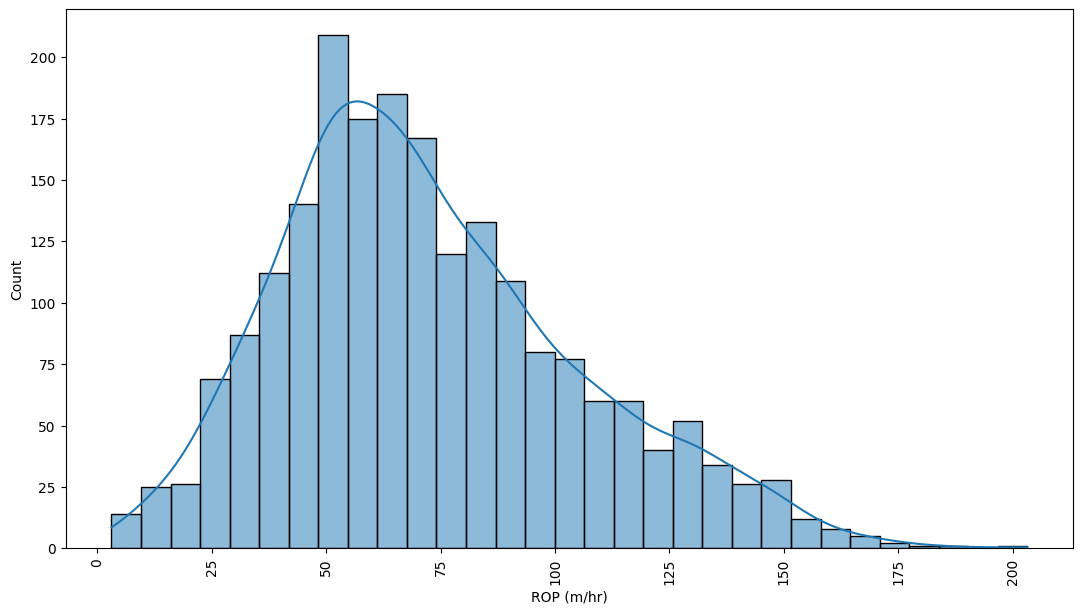

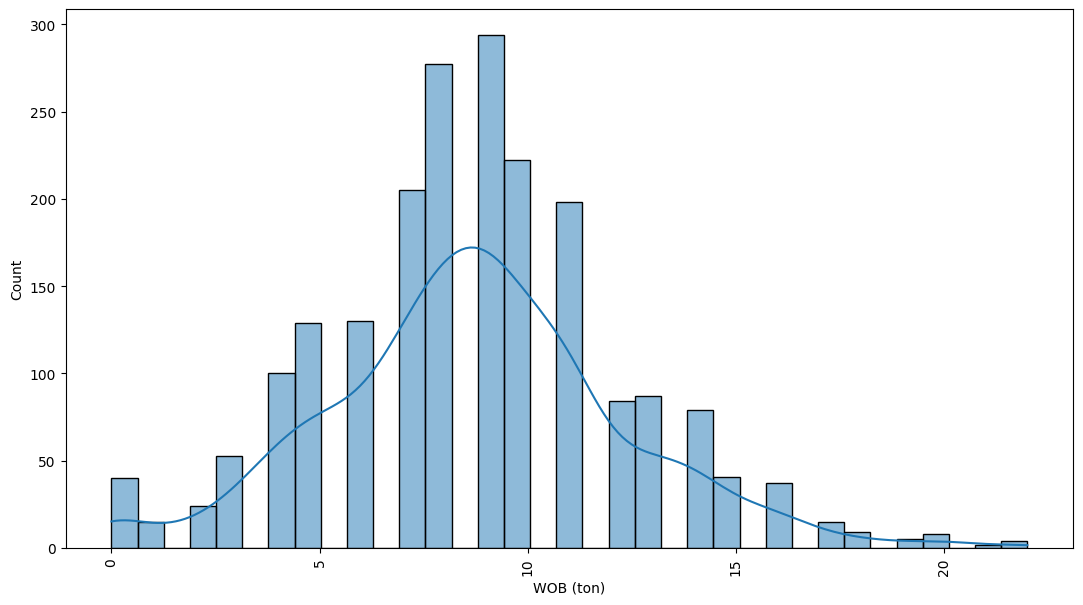

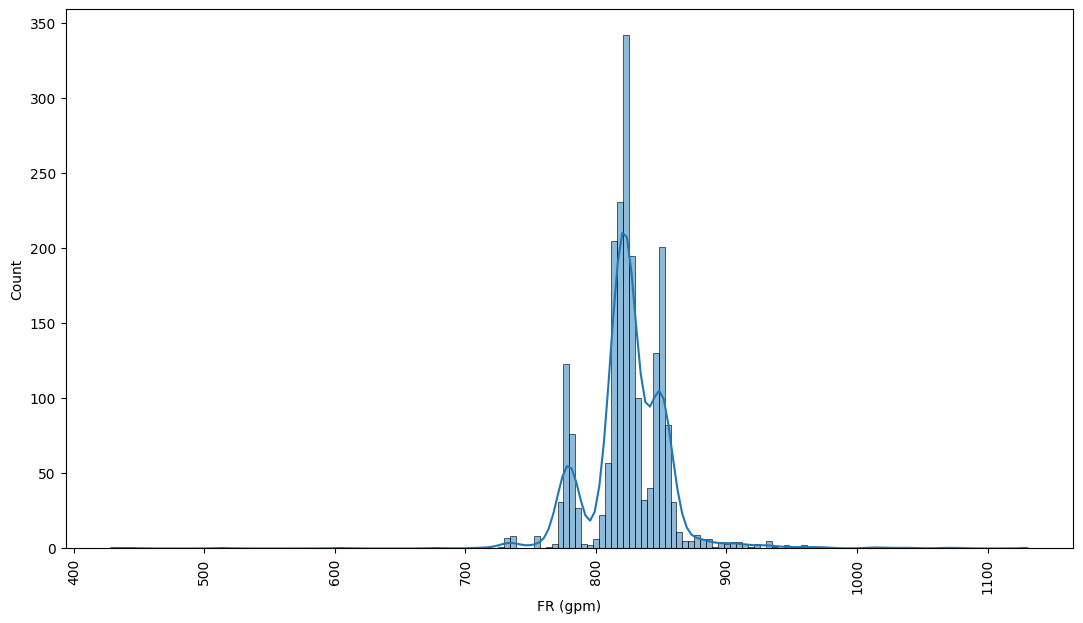

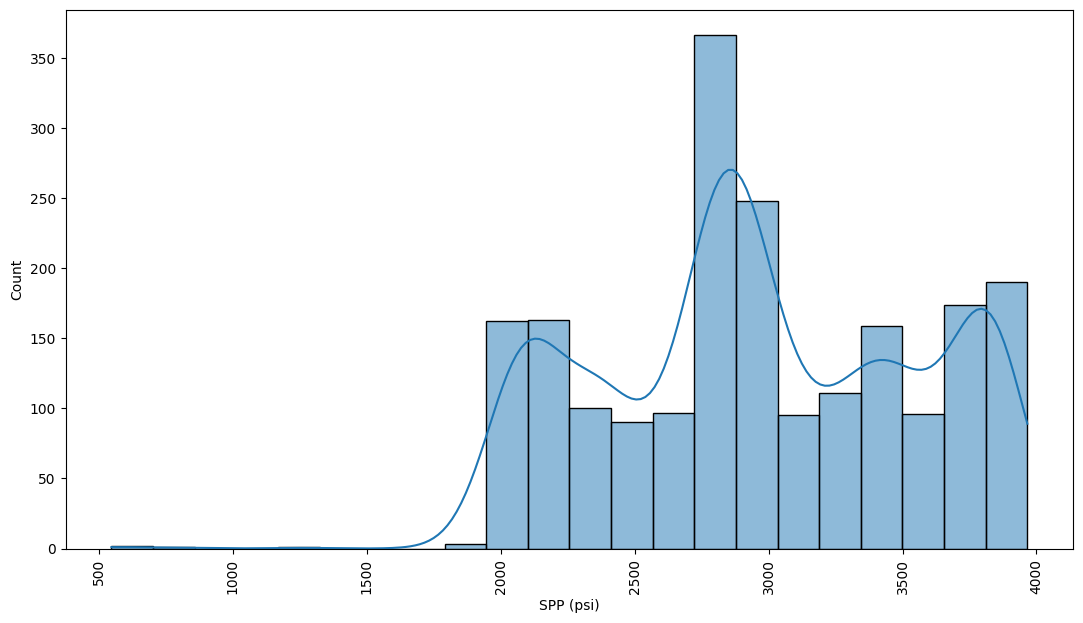

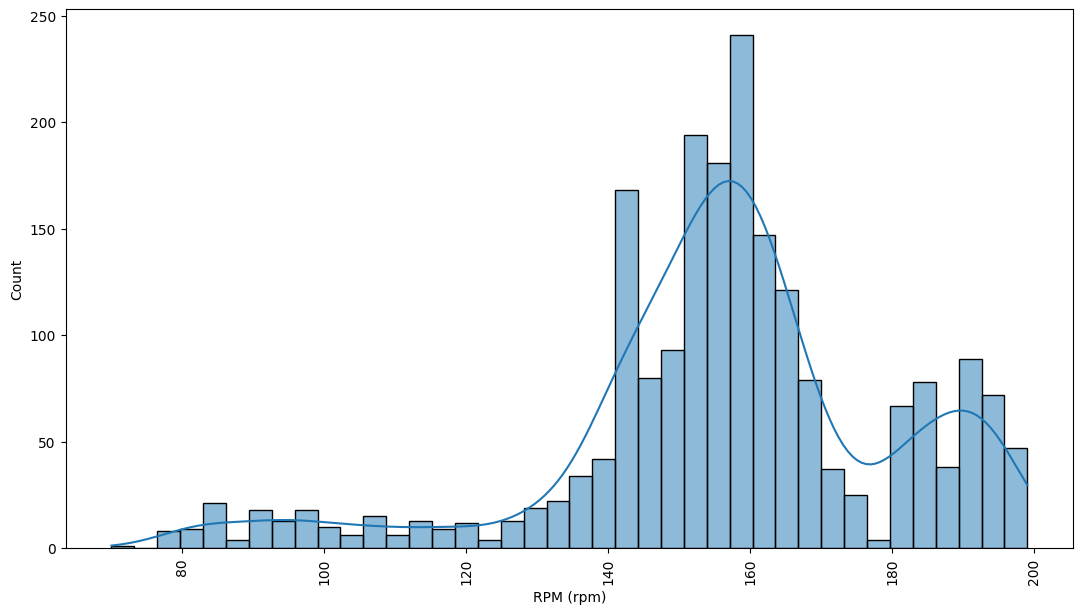

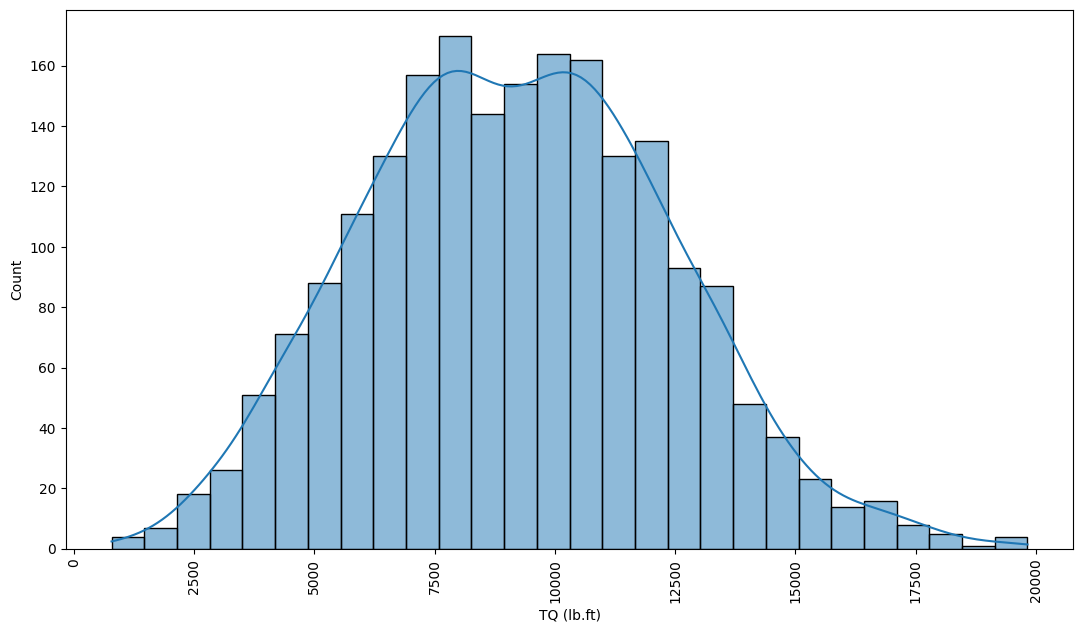

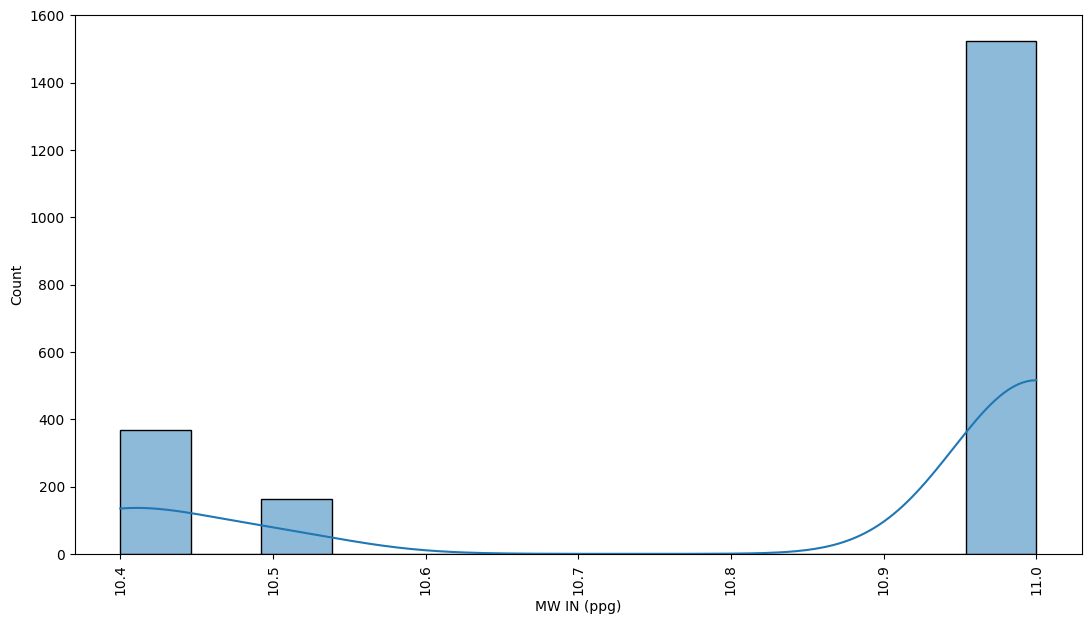

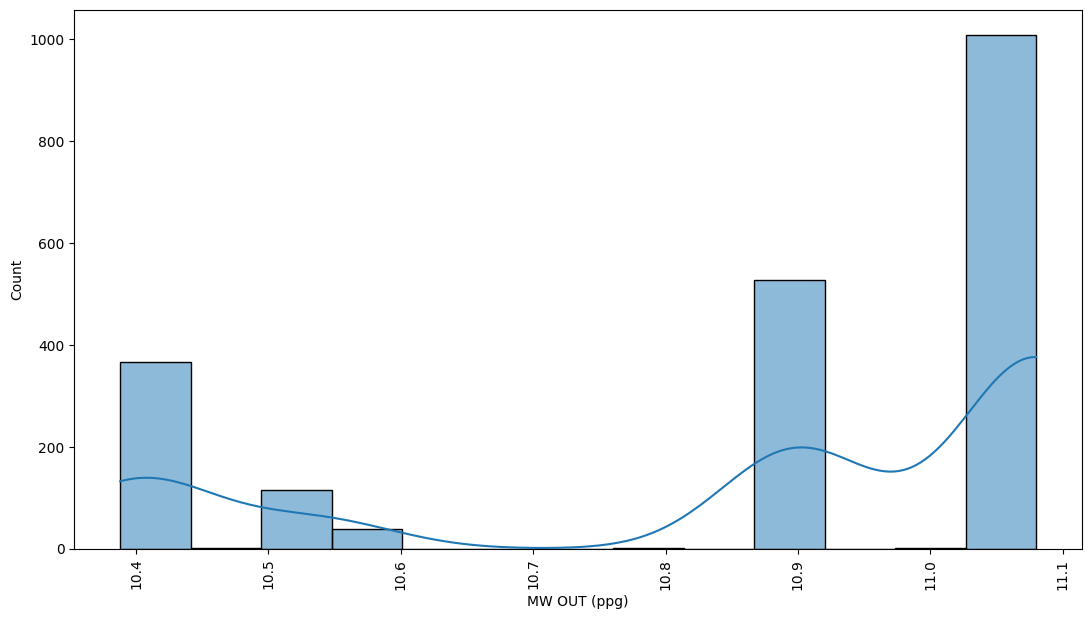

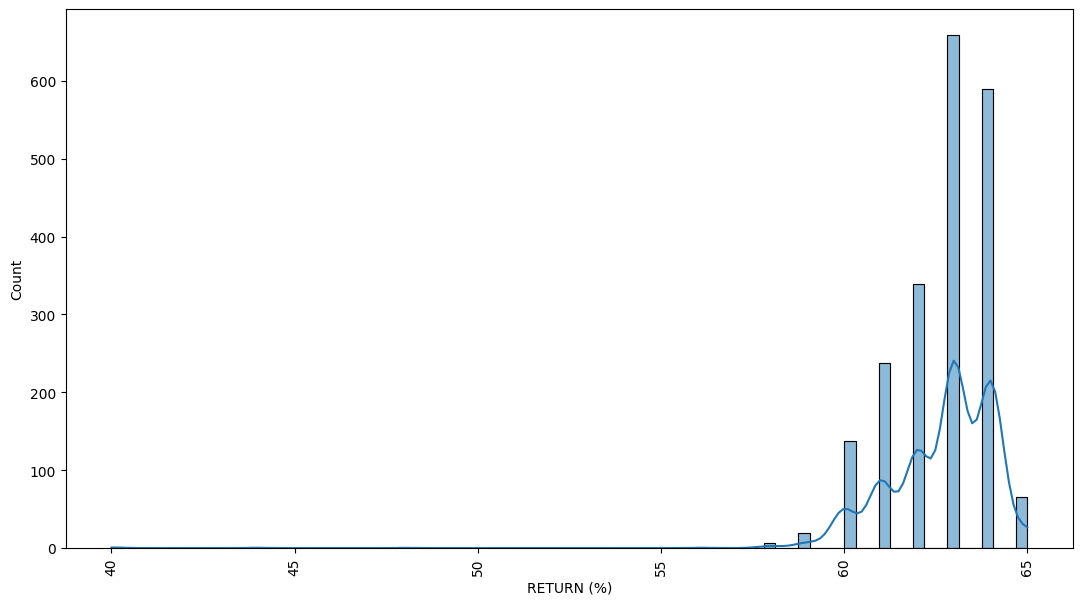

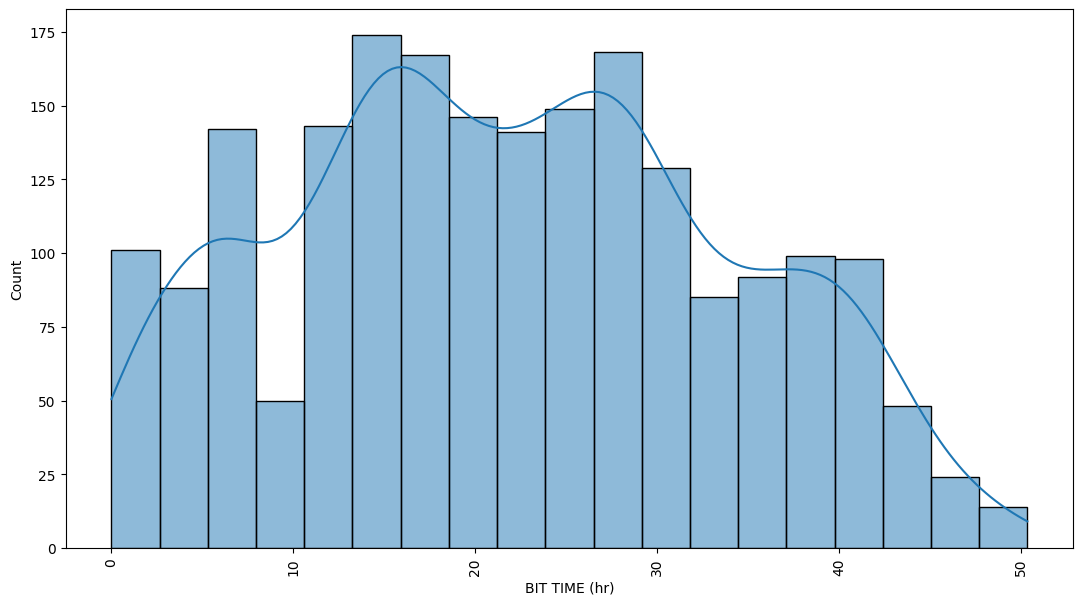

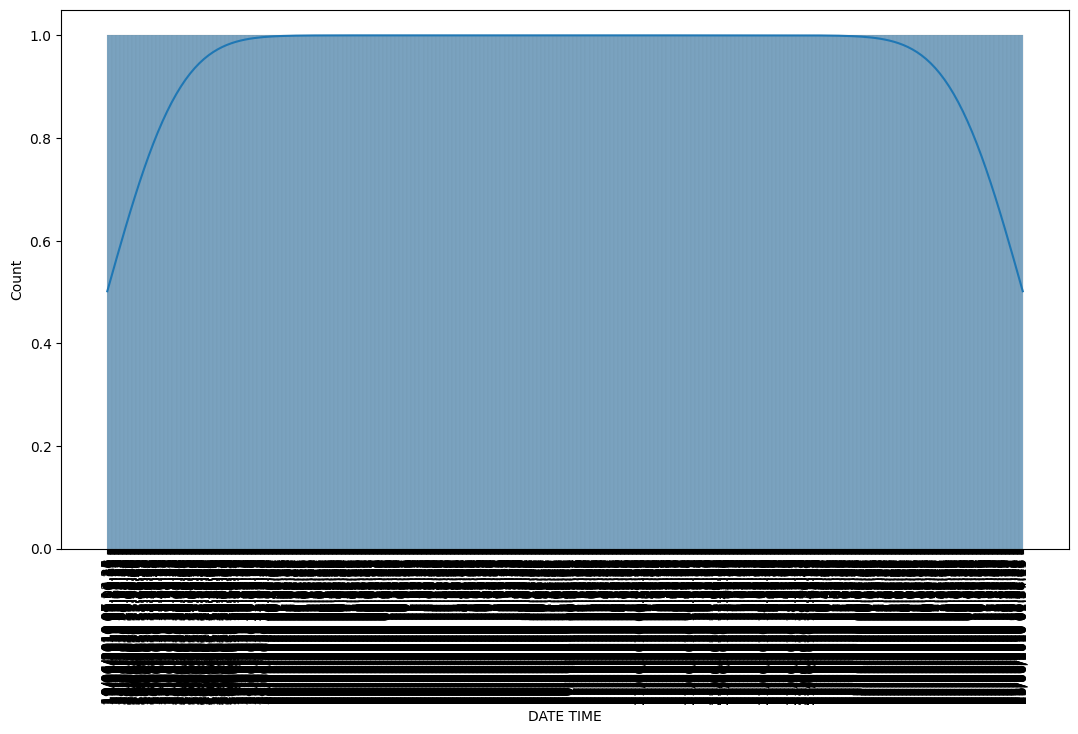

In [ ]:
#dispalying histogram (2)
for i in data.columns:
    plt.figure(figsize=(13,7))
    sb.histplot(data=data[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

## Data Preprocessing 2 (Label Encoding)

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [ ]:
#displaying unique value in Formation column
data['Formation'].unique()

array(['Seno', 'Turo', 'Ceno', 'Albi', 'Apti', 'Barre', 'Neo', 'Malcolm',
       'Eren Shale', 'Mikasa Anhydrite'], dtype=object)

In [ ]:
#converting cateforical data to numerical data in Formation column
label_encoder = preprocessing.LabelEncoder()
data['Formation'] = label_encoder.fit_transform(data['Formation'])
data['Formation'].unique()

array([8, 9, 3, 0, 1, 2, 7, 5, 4, 6])

In [ ]:
data.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,8,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,8,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,8,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,8,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,8,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


# Train-Test Split

In machine learning, the process of training and evaluating a model involves splitting your available data into two main sets: the training set and the test set.
* The training set is used to train the model. During training, the model learns the underlying patterns and relationships within the data. It adjusts its internal parameters (weights and biases) to minimize the difference between its predictions and the actual target values in the training set.
*  The test set is used to evaluate the performance of the trained model. It acts as a stand-in for unseen data in real-world scenarios. By evaluating the model on data it has never seen before, you can get an estimate of how well the model is likely to perform on new, unseen examples.

In [ ]:
#initializing feature X and target y
X = data.drop(['ROP (m/hr)', 'DATE TIME', 'BIT TIME (hr)', 'TMD (m)', 'RETURN (%)', 'MW IN (ppg)', 'MW OUT (ppg)', 'SPP (psi)'], axis=1)
y = data['ROP (m/hr)']

#spliting feature and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling

Scaling is a process in data processing where the values in a dataset are changed so that they have a uniform or equal scale, usually within a certain range. The main purpose of scaling is to ensure that the variables in the dataset have a balanced influence on the data processing algorithm or machine learning model to be used.

In [ ]:
#fitting StandardScaler to training data
sc = StandardScaler()
sc.fit(X_train)

#transforming training data and test data using fitted scaler
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model Building

## Random Forest Regressor

In [ ]:
#defining hyperparameters tuning
rf = RandomForestRegressor()
param_grid_rf = {'max_depth': [3, 5, 7, 9],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': [1.0]}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [ ]:
#resulting best hyperparameters
grid_search_rf.best_params_

{'max_depth': 9,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
#training the model
rf = RandomForestRegressor(random_state=0,
                          max_depth=9,
                          min_samples_leaf=1,
                          min_samples_split=2,
                          max_features=1.0)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=9, random_state=0)

## Decision Tree Regressor

In [ ]:
#defining hyperparameters tuning
dtree = DecisionTreeRegressor()
param_grid_dtree = {'max_depth': [2, 4, 6, 8],
                    'min_samples_split': [2, 4, 6, 8],
                    'min_samples_leaf': [1, 2, 3, 4],
                    'max_features': [1.0]}
grid_search_dtree = GridSearchCV(dtree, param_grid_dtree, cv=5, scoring='r2')
grid_search_dtree.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='r2')

In [ ]:
#resulting best hyperparameters
grid_search_dtree.best_params_

{'max_depth': 8,
 'max_features': 1.0,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [ ]:
#training the model
dtree = DecisionTreeRegressor(random_state=0,
                              max_depth=8,
                              min_samples_leaf=4,
                              min_samples_split=6,
                              max_features=1.0)
dtree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=8, max_features=1.0, min_samples_leaf=4,
                      min_samples_split=6, random_state=0)

## AdaBoost Regressor

In [ ]:
#defining hyperparameters tuning
aboost = AdaBoostRegressor()
param_grid_aboost = {'n_estimators': [50, 100, 150],
                     'learning_rate':[0.01, 0.1, 1, 10]}
grid_search_aboost = GridSearchCV(aboost, param_grid_aboost, cv=5, scoring='r2')
grid_search_aboost.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [ ]:
#resulting best hyperparameters
grid_search_aboost.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [ ]:
#training the model
aboost = AdaBoostRegressor(random_state=0,
                           n_estimators=150,
                           learning_rate=0.1)
aboost.fit(X_train_scaled, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=150, random_state=0)

# Model Evaluation

## Random Forest Regressor

In [ ]:
#testing the model
y_pred_rf = rf.predict(X_test_scaled)

#resulting metrics the model
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
r2_rf = metrics.r2_score(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)

df_rf = pd.DataFrame({'Metric':['Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R2 Score'],
                          'Score': [mae_rf, mape_rf, mse_rf, rmse_rf, r2_rf]})
df_rf = df_rf.style.hide(axis="index")
df_rf

Metric,Score
Mean Absolute Error (MAE),11.119154
Mean Absolute Percentage Error (MAPE),0.178768
Mean Squared Error (MSE),239.077767
Root Mean Squared Error (RMSE),15.462140
R2 Score,0.794991


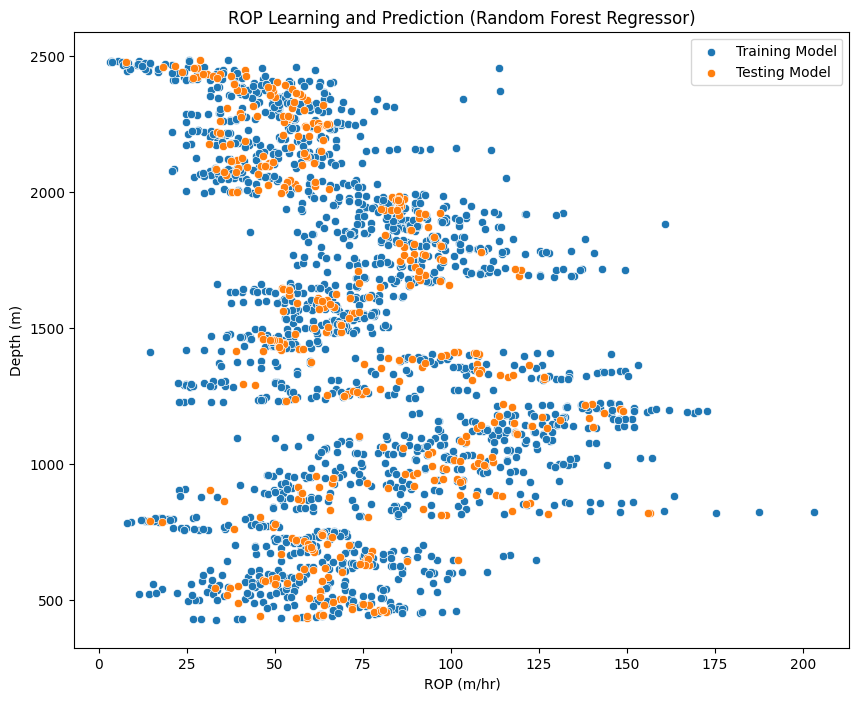

In [ ]:
#displaying scatterplot of model results
plt.figure(figsize=(10, 8))
sb.scatterplot(x=y_train, y=X_train['TVD (m)'], label='Training Model')
sb.scatterplot(x=y_pred_rf, y=X_test['TVD (m)'], label='Testing Model')
plt.title('ROP Learning and Prediction (Random Forest Regressor)')
plt.xlabel('ROP (m/hr)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

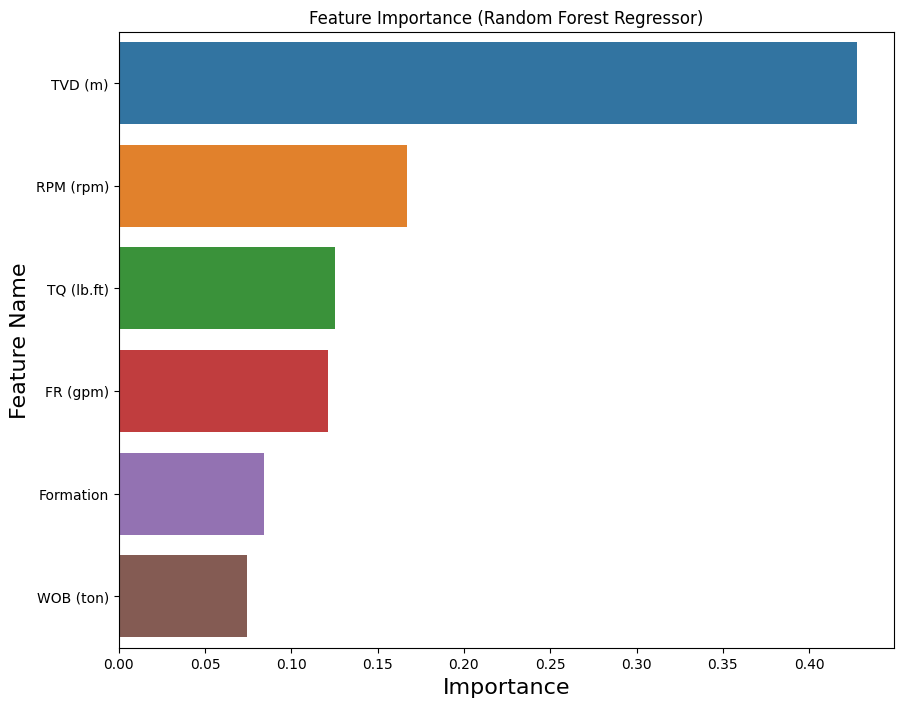

In [ ]:
#displaying feature importance of model
imp_data_rf = pd.DataFrame({'Feature Name': X.columns,
                            'Importance': rf.feature_importances_})
fi = imp_data_rf.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sb.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance (Random Forest Regressor)')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

## Decision Tree Regressor

In [ ]:
#testing the model
y_pred_dtree = dtree.predict(X_test_scaled)

#resulting metrics the model
mae_dtree = metrics.mean_absolute_error(y_test, y_pred_dtree)
mape_dtree = mean_absolute_percentage_error(y_test, y_pred_dtree)
mse_dtree = metrics.mean_squared_error(y_test, y_pred_dtree)
r2_dtree = metrics.r2_score(y_test, y_pred_dtree)
rmse_dtree = math.sqrt(mse_dtree)

df_dtree = pd.DataFrame({'Metric':['Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R2 Score'],
                          'Score': [mae_dtree, mape_dtree, mse_dtree, rmse_dtree, r2_dtree]})
df_dtree = df_dtree.style.hide(axis="index")
df_dtree

Metric,Score
Mean Absolute Error (MAE),13.263710
Mean Absolute Percentage Error (MAPE),0.210931
Mean Squared Error (MSE),324.593419
Root Mean Squared Error (RMSE),18.016476
R2 Score,0.721662


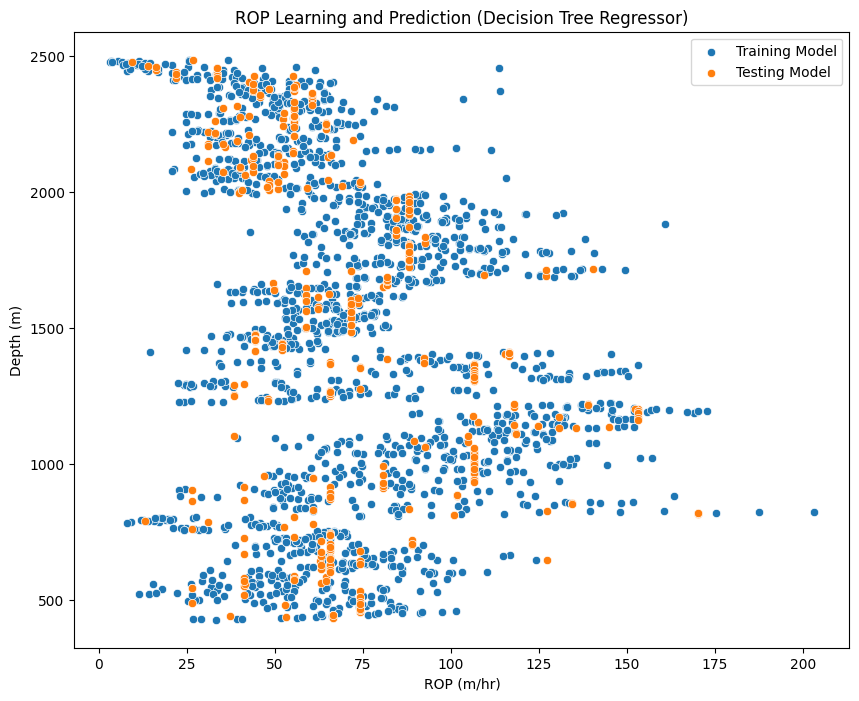

In [ ]:
#displaying scatterplot of model results
plt.figure(figsize=(10, 8))
sb.scatterplot(x=y_train, y=X_train['TVD (m)'], label='Training Model')
sb.scatterplot(x=y_pred_dtree, y=X_test['TVD (m)'], label='Testing Model')
plt.title('ROP Learning and Prediction (Decision Tree Regressor)')
plt.xlabel('ROP (m/hr)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

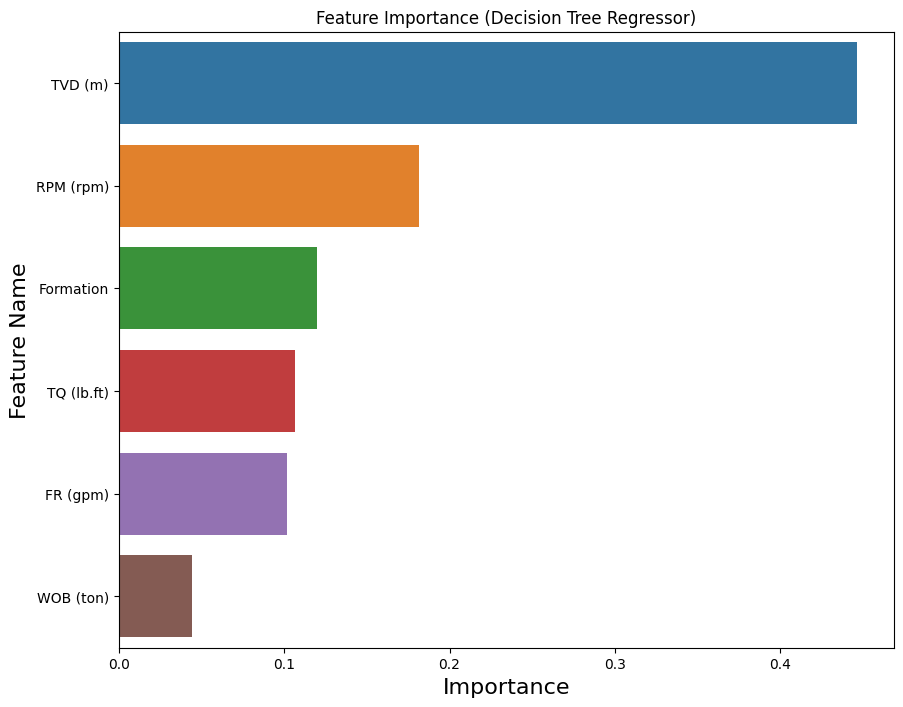

In [ ]:
#displaying feature importance of model
imp_data_dtree = pd.DataFrame({'Feature Name': X.columns,
                               'Importance': dtree.feature_importances_})
fi = imp_data_dtree.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sb.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance (Decision Tree Regressor)')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

## AdaBoost Regressor

In [ ]:
#testing the model
y_pred_aboost = aboost.predict(X_test_scaled)

#resulting metrics the model
mae_aboost = metrics.mean_absolute_error(y_test, y_pred_aboost)
mape_aboost = mean_absolute_percentage_error(y_test, y_pred_aboost)
mse_aboost = metrics.mean_squared_error(y_test, y_pred_aboost)
r2_aboost = metrics.r2_score(y_test, y_pred_aboost)
rmse_aboost = math.sqrt(mse_aboost)

df_aboost = pd.DataFrame({'Metric':['Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R2 Score'],
                          'Score': [mae_aboost, mape_aboost, mse_aboost, rmse_aboost, r2_aboost]})
df_aboost = df_aboost.style.hide(axis="index")
df_aboost

Metric,Score
Mean Absolute Error (MAE),17.577782
Mean Absolute Percentage Error (MAPE),0.325557
Mean Squared Error (MSE),482.008405
Root Mean Squared Error (RMSE),21.954690
R2 Score,0.586678


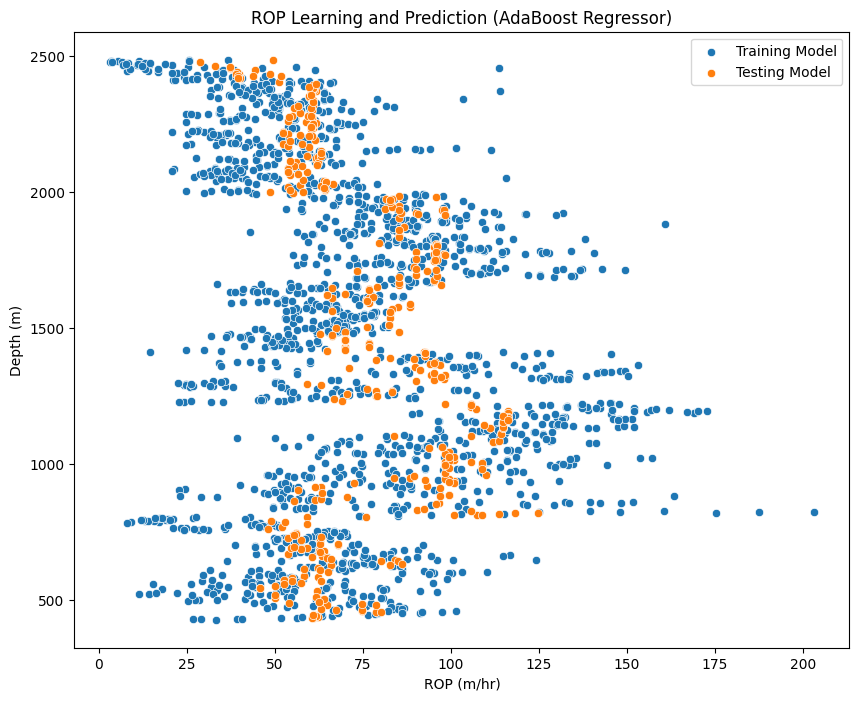

In [ ]:
#displaying scatterplot of model results
plt.figure(figsize=(10, 8))
sb.scatterplot(x=y_train, y=X_train['TVD (m)'], label='Training Model')
sb.scatterplot(x=y_pred_aboost, y=X_test['TVD (m)'], label='Testing Model')
plt.title('ROP Learning and Prediction (AdaBoost Regressor)')
plt.xlabel('ROP (m/hr)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

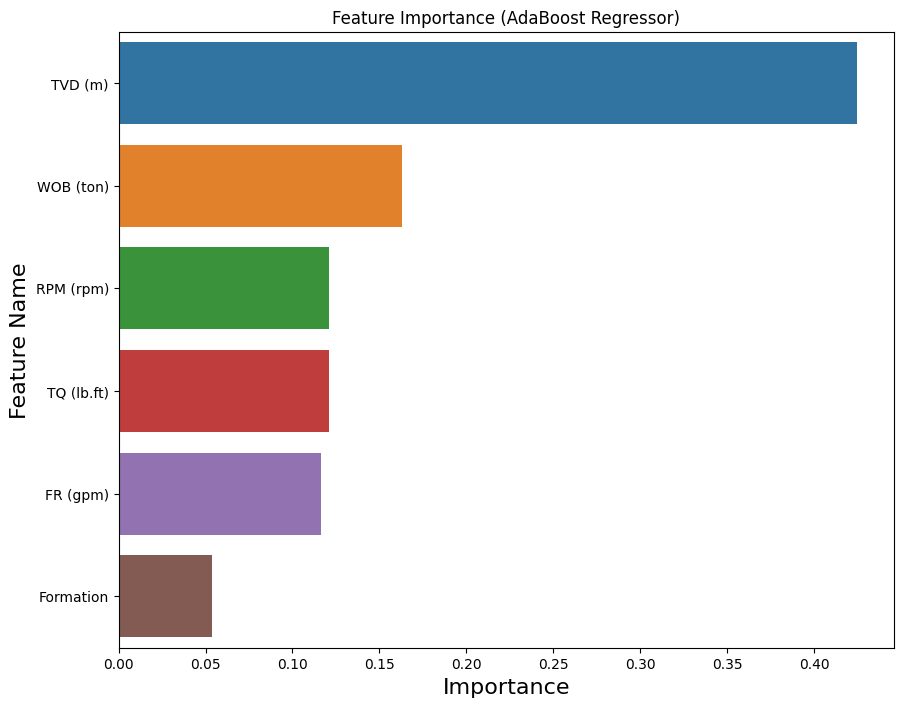

In [ ]:
#displaying feature importance of model
imp_data_aboost = pd.DataFrame({'Feature Name': X.columns,
                                'Importance': aboost.feature_importances_})
fi = imp_data_aboost.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sb.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance (AdaBoost Regressor)')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()